In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Day 23: Euler's Method for Solving IVPs

As mentioned in the motivational notebook, we are seeking to solve IVPs of the form $\vec{y}' = \vec{F}\left(x, \vec{y}\right)$ subject to $\vec{y}\left(a\right) = \vec{\alpha}$, where

$$\vec{F}\left(x, \vec{y}\right) = \left[\begin{array}{c}y_1\\ y_2\\ \vdots\\ y_n\\ f\left(x, \vec{y}\right)\end{array}\right]$$

and $y_i = y^{\left(i\right)}$. *Euler's Method* of solution uses the truncated Taylor Series for $\vec{y}$ near $x$. That is,

$$\vec{y}\left(x + h\right) \approx \vec{y}\left(x\right) + \vec{y}'\left(x\right)h~~~~~~~~~(\bigstar)$$

The $h$ in the relationship above is called the *step size*. We can use the relationship to construct a solution through forward-iteration, using steps of size $h$, beginning from the initial point $\left(x, \vec{y}\right)$.




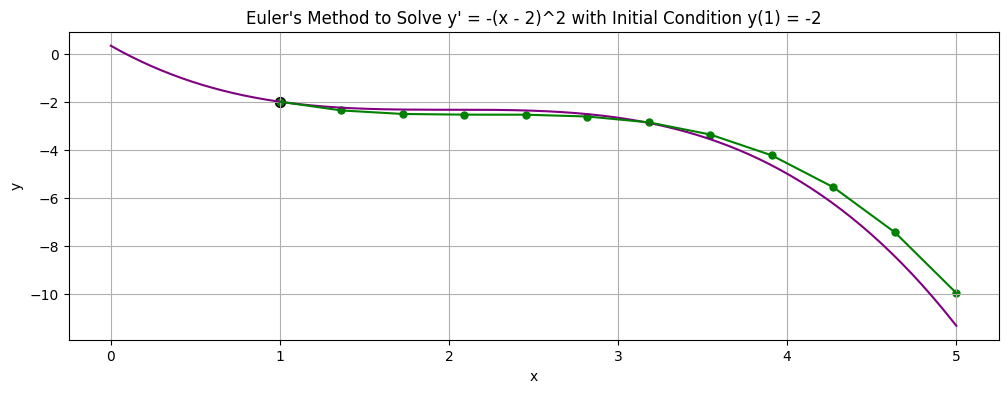

In [ ]:
#@title
def dy_dx(x):
  return -(x - 2)**2

def f(x):
  return -(1/3)*(x - 2)**3 - 7/3

x_vals = np.linspace(0, 5, 250)
y1_vals = dy_dx(x_vals)
f_vals = f(x_vals)

x_its = np.linspace(1, 5, 12)
h = x_its[1] - x_its[0]
y_its = np.zeros_like(x_its)

y_its[0] = -2
for i in range(1, len(x_its)):
  y_its[i] = y_its[i - 1] + dy_dx(x_its[i-1])*h

plt.figure(figsize = (12, 4))
plt.plot(x_vals, f_vals, color = "purple")
plt.scatter(1, -2, color = "black", s = 50)
plt.plot(x_its, y_its, color = "green")
plt.scatter(x_its, y_its, color = "green", s = 25)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Euler's Method to Solve y' = -(x - 2)^2 with Initial Condition y(1) = -2")
plt.show()

As can be seen in the plot above, Euler's Method assumes local linearity. That is, for small enough step sizes ($h$) the solution to the IVP on $\left[x, x+h\right]$ is well-approximated by a linear function.

## Error in Euler's Method

The error in approximating the solution to the IVP by the truncated Taylor Series in equation ($\bigstar$) is given by

\begin{align*} \vec{E} &= \frac{1}{2}\vec{y}''\left(\xi\right)h^2\\
&= \mathcal{O}\left(h^2\right)
\end{align*}

with $x < \xi < x + h$. We can obtain a rough idea of the accumulated error through forward-iteration of the Euler Method after $n$ steps, covering the interval $\left[x_0, x_n\right]$ using the relationship below.

\begin{align*} \vec{E}_{acc} &= n\vec{E}\\
&= \frac{x_n - x_0}{h}\vec{E}\\
&= \frac{x_n - x_0}{h}\mathcal{O}\left(h^2\right)\\
&= \left(x_n - x_0\right)\mathcal{O}\left(h\right)\\
&= \mathcal{O}\left(h\right)
\end{align*}

The accumulated error then is linear in $h$, which is large compared to the errors we've been striving for in recent discussions. Suppressing the truncation error to an acceptable level requires very small $h$, which results in a large number of iterations required to move through an entire interval and also an increase in the roundoff error. Euler's Method is therefore not often used in applications because it is inefficient. The value of the method is in its simplicity.

### Implementing Euler's Method

While Euler's Method is not typically utilized, it is worth constructing a working implementation and trying it out. We'll do that below.

In [30]:
def EulerMethod(F, x, y, xStop, h):
  X = []
  Y = []
  X.append(x)
  Y.append(y)

  while x < xStop:
    h = min(h, xStop - x)
    y = y + h*F(x, y)
    x = x + h
    X.append(x)
    Y.append(y)

  return np.array(X), np.array(Y)

**Example:** Use Euler's Method to construct an approximation of the solution to $y' = x\sin\left(x^2\right)$ subject to $y\left(\sqrt{\pi/2}\right) = 0$ on the interval $\left[\sqrt{\pi/2}, \sqrt{3\pi}\right]$. Plot the result using various numbers of steps. Compare your solution to the analytical solution $\displaystyle{y = -\frac{1}{2}\cos\left(x^2\right)}$.

> *Solution.*

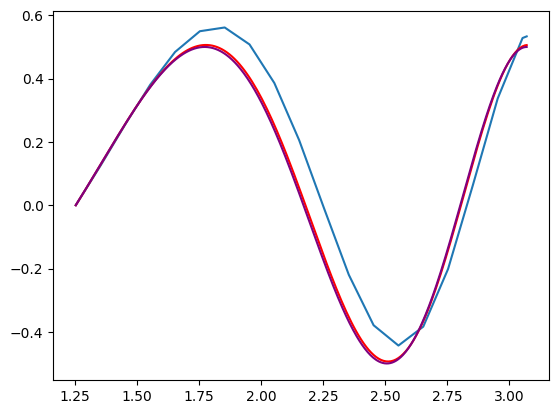

In [ ]:
def F(x, y):
  return x*np.sin(x**2)

X_1, Y_1 = EulerMethod(F, x = np.sqrt(np.pi/2), y = 0, xStop = np.sqrt(3*np.pi), h = 0.1)
X_01, Y_01 = EulerMethod(F, x = np.sqrt(np.pi/2), y = 0, xStop = np.sqrt(3*np.pi), h = 0.01)

x_sol = np.linspace(np.sqrt(np.pi/2), np.sqrt(3*np.pi), 500)
y_sol = (-1/2)*np.cos(x_sol**2)

plt.plot(X_1, Y_1)
plt.plot(X_01, Y_01, color = "red")
plt.plot(x_sol, y_sol, color = "purple")
plt.show()

In [ ]:
# @title
def F(x, y):
  return x*np.sin(x**2)

x, y = np.meshgrid(np.linspace(1, 3.5, 25),
				np.linspace(-0.6, 0.6, 25))
x_linspace = np.linspace(1, 3.5, 50)

# Directional vectors
v = F(x, y)
magnitude = np.sqrt(1 + v**2)
u = np.ones_like(v)

# Plotting Slope Field with QUIVER
plt.figure(figsize = (12, 4))
plt.quiver(x, y, u/magnitude, v/magnitude, color='purple')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Slope Field for F(x, y) = x*sin(x**2)")

# Setting x, y boundary limits
plt.xlim(1, 3.5)
plt.ylim(-0.6, 0.6)

# Show plot with grid
plt.grid()
plt.show()

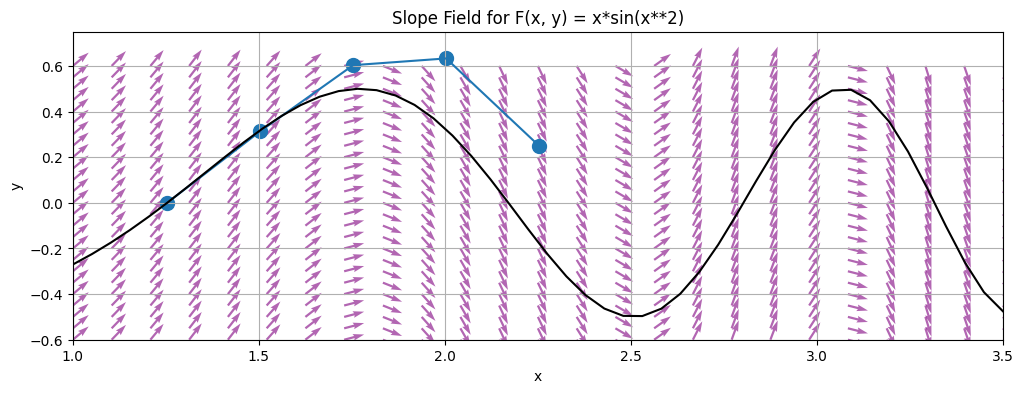

In [25]:
def F(x, y):
  return x*np.sin(x**2)

def f_sol(x):
  return -0.5*np.cos(x**2)

X_est , Y_est = EulerMethod(F, x = np.sqrt(np.pi/2), y = 0, xStop = np.sqrt(3*np.pi), h = 0.25)

#@title
x, y = np.meshgrid(np.linspace(1, 3.5, 25),
				np.linspace(-0.6, 0.6, 25))
x_linspace = np.linspace(1, 3.5, 50)
sol_over_linspace = f_sol(x_linspace)

# Directional vectors
v = F(x, y)
magnitude = np.sqrt(1 + v**2)
u = np.ones_like(v)

# Plotting Slope Field with QUIVER
plt.figure(figsize = (12, 4))
plt.quiver(x, y, u/magnitude, v/magnitude, color='purple', alpha = 0.6)
#plt.plot(x_linspace, sol_over_linspace, color = "green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Slope Field for F(x, y) = x*sin(x**2)")

# Setting x, y boundary limits
plt.xlim(1, 3.5)
plt.ylim(-0.6, 0.75)

plt.plot(X_est[0:5], Y_est[0:5])
plt.scatter(X_est[0:5], Y_est[0:5], s = 100)

plt.plot(x_linspace, sol_over_linspace, color = "black")

# Show plot with grid
plt.grid()
plt.show()

**Example:** Use the `EulerMethod()` routine to construct an approximation of the solution to the IVP $y' + 4y = x^2$ with $y\left(0\right) = 1$ on the interval $\left[0, 0.03\right]$.

> *Solution.*

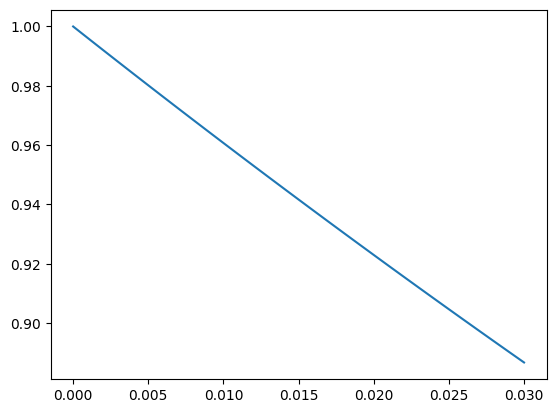

In [ ]:
def F(x, y):
  return -4*y + x**2

X, Y = EulerMethod(F, x = 0, y = 1, xStop = 0.03, h = 0.001)
plt.plot(X, Y)
plt.show()

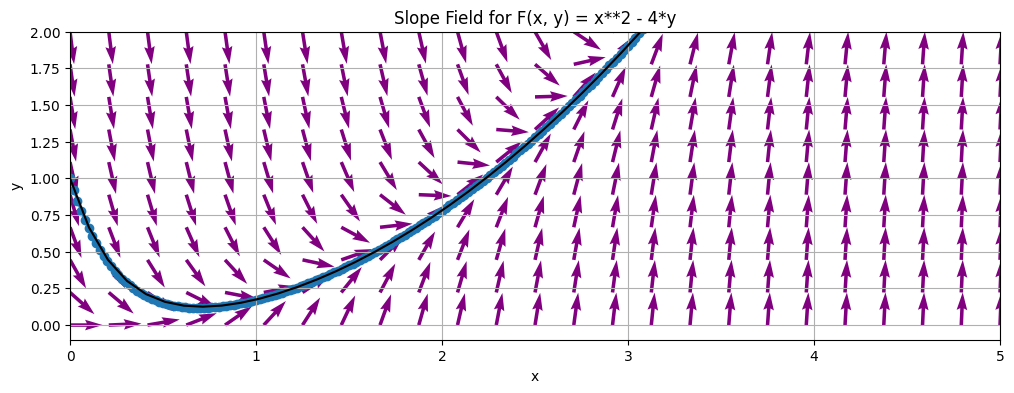

,X_est,Y_est
0,0.00,1.000000
1,0.02,0.920000
2,0.04,0.846408
3,0.06,0.778727
4,0.08,0.716501
...,...,...
247,4.94,5.513400
248,4.96,5.560400
249,4.98,5.607600
250,5.00,5.655000


In [16]:
def F(x, y):
  return x**2 - 4*y

def f_sol(x):
  term1 = (31/32)*np.exp(-4*x)
  term2 = (1/4)*x**2
  return term1 + term2 - (1/8)*x + (1/32)

X_est , Y_est = EulerMethod(F, x = 0, y = 1, xStop = 5, h = 0.02)

#@title
x, y = np.meshgrid(np.linspace(0, 5, 25),
				np.linspace(0, 2, 10))
x_linspace = np.linspace(0, 5, 50)
sol_over_linspace = f_sol(x_linspace)

# Directional vectors
v = F(x, y)
u = np.ones_like(v)
magnitude = np.sqrt(1 + v**2)

# Plotting Vector Field with QUIVER
plt.figure(figsize = (12, 4))
plt.quiver(x, y, u/magnitude, v/magnitude, color='purple')
#plt.plot(x_sol, y_sol, color = "green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Slope Field for F(x, y) = x**2 - 4*y")

# Setting x, y boundary limits
plt.xlim(0, 5)
plt.ylim(-0.1, 2)

plt.plot(X_est, Y_est)
plt.scatter(X_est, Y_est)

plt.plot(x_linspace, sol_over_linspace, color = "black")

# Show plot with grid
plt.grid()
plt.show()

import pandas as pd
pd.DataFrame({"X_est" : X_est, "Y_est" : Y_est})

The previous two examples were of first-order IVPs. We can also use Euler's Method to construct numerical approximation to the solutions for higher-order IVPs. Consider the example and solution below.

**Example:** Use Euler's Method to construct a numerical approximation of the solution to the IVP $y'' = 0.1y' - x$ subject to the constraints $y\left(0\right) = 0$ and $y'\left(0\right) = 1$. Construct your approximate solution on the interval $\left[0, 2\right]$ using $h = 0.05$.

> *Solution.*

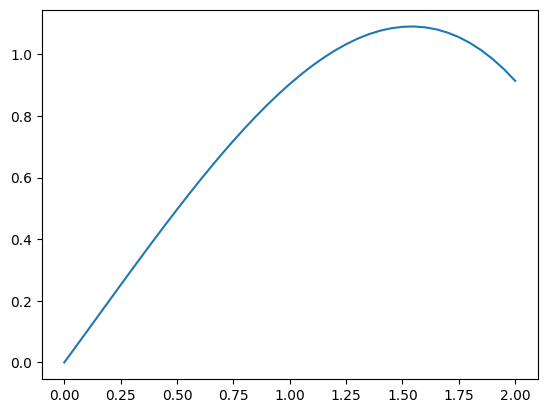

In [31]:
def F(x, y):
  F_sys = np.zeros(2)
  F_sys[0] = y[1]
  F_sys[1] = 0.1*y[1] - x
  return F_sys

X, Y = EulerMethod(F, x = 0, y = np.array([0, 1]), xStop = 2, h = 0.05)

plt.plot(X, Y[: , 0]) #Plot only position

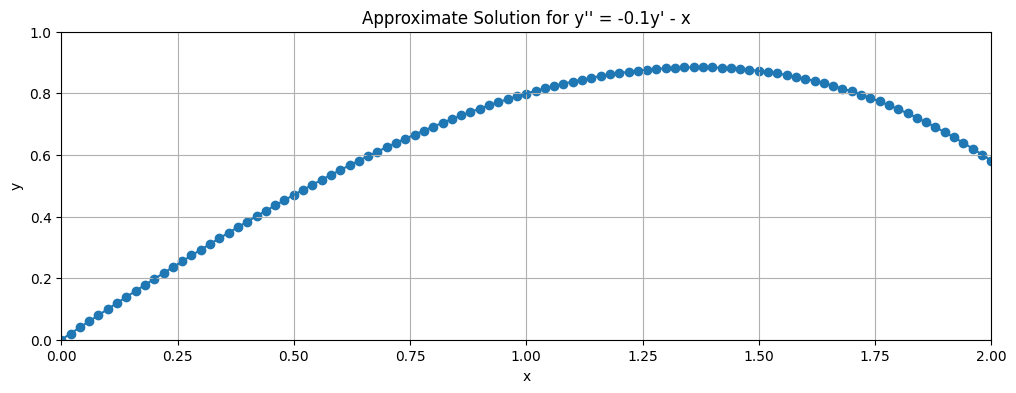

,X_est,Y_est
0,0.00,0.000000
1,0.02,0.020000
2,0.04,0.039960
3,0.06,0.059872
4,0.08,0.079728
...,...,...
96,1.92,0.656731
97,1.94,0.638938
98,1.96,0.620412
99,1.98,0.601147


In [26]:
def EulerMethod(F, x, y, xStop, h):
  X = []
  Y = []
  X.append(x)
  Y.append(y[0])

  while x < xStop:
    h = min(h, xStop - x)
    y = y + h*F(x, y)
    x = x + h
    X.append(x)
    Y.append(y[0])

  return np.array(X), np.array(Y)

def F(x, y):
  f = np.zeros(2)
  f[0] = y[1]
  f[1] = -0.1*y[1] - x
  return f

X_est , Y_est = EulerMethod(F, x = 0, y = [0, 1], xStop = 2, h = 0.02)

#@title
#x, y = np.meshgrid(np.linspace(0, 5, 25),
#				np.linspace(0, 2, 10))
#x_linspace = np.linspace(0, 5, 50)
#sol_over_linspace = f_sol(x_linspace)

# Directional vectors
#v = F(x, y)
#u = np.ones_like(v)
#magnitude = np.sqrt(1 + v**2)

# Plotting Vector Field with QUIVER
plt.figure(figsize = (12, 4))
#plt.quiver(x, y, u/magnitude, v/magnitude, color='purple')
#plt.plot(x_sol, y_sol, color = "green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Approximate Solution for y'' = -0.1y' - x")

# Setting x, y boundary limits
plt.xlim(0, 2)
plt.ylim(0, 1)

plt.plot(X_est, Y_est)
plt.scatter(X_est, Y_est)

#plt.plot(x_linspace, sol_over_linspace, color = "black")

# Show plot with grid
plt.grid()
plt.show()

import pandas as pd
pd.DataFrame({"X_est" : X_est, "Y_est" : Y_est})